In [26]:
# Configure matplotlib for inline display in notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print('Matplotlib configured for inline display')

Matplotlib configured for inline display


In [27]:
# Paths and data preview
from pathlib import Path
import pandas as pd

# Set pandas options to show all columns and prevent wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

base = Path('..').resolve()  # notebook is in python/ folder
csv_path = base / 'project_cluster.csv'
print('Expecting CSV at:', csv_path)
if not csv_path.exists():
    raise FileNotFoundError(f'project_cluster.csv not found at {csv_path}')

# Quick peek at the raw CSV (first 10 rows)
df_raw = pd.read_csv(csv_path)
print('Raw data shape:', df_raw.shape)
display(df_raw.head(10))

Expecting CSV at: C:\Users\demosgod\Desktop\PROJECTS\HotelCancellationsClustering\project_cluster.csv
Raw data shape: (2000, 17)


,Booking_ID,number.of.adults,number.of.children,number.of.weekend.nights,number.of.week.nights,type.of.meal,car.parking.space,room.type,lead.time,market.segment.type,repeated,P.C,P.not.C,average.price,special.requests,date.of.reservation,booking.status
0,BID19169,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,Online,0,0,0,115.00,1,10/8/2017,Not_Canceled
1,BID26830,2,0,1,4,Meal Plan 1,0,Room_Type 1,11,Online,0,0,0,90.00,2,8/17/2017,Canceled
2,BID00278,1,0,2,1,Meal Plan 1,0,Room_Type 1,33,Online,0,0,0,82.90,2,5/3/2018,Not_Canceled
3,BID22091,2,0,0,1,Meal Plan 2,0,Room_Type 1,55,Offline,0,0,0,104.00,0,6/4/2018,Not_Canceled
4,BID17706,2,1,0,2,Meal Plan 1,0,Room_Type 1,138,Online,0,0,0,139.50,1,9/8/2018,Not_Canceled
5,BID32402,3,0,0,3,Meal Plan 1,0,Room_Type 4,160,Online,0,0,0,137.70,0,7/14/2018,Canceled
6,BID22733,1,0,1,1,Meal Plan 1,0,Room_Type 1,3,Online,1,0,1,89.50,1,12/19/2018,Not_Canceled
7,BID35379,2,0,0,3,Meal Plan 1,0,Room_Type 1,107,Offline,0,0,0,58.00,0,3/17/2018,Not_Canceled
8,BID18684,1,0,1,1,Meal Plan 1,0,Room_Type 4,17,Online,0,0,0,114.73,1,12/9/2018,Not_Canceled
9,BID15576,2,0,0,3,Meal Plan 1,0,Room_Type 1,18,Online,0,0,0,12.00,2,2/9/2017,Not_Canceled


## Preprocessing
This cell runs the preprocessing steps described in `notes.md`:
- Arrival Month, Total Guests, Is_Family, Total Nights
- Cancellation Ratio (smoothed), Price per Person
- Drop `Booking_ID` and original date columns, keep `booking.status` for evaluation
- One-hot encode categorical fields and scale numeric features

--- Step 1: Copying original dataframe
--- Step 2: Feature engineering
--- Step 3: Drop columns and separate labels

--- Visualizing 17 Distributions BEFORE Scaling ---


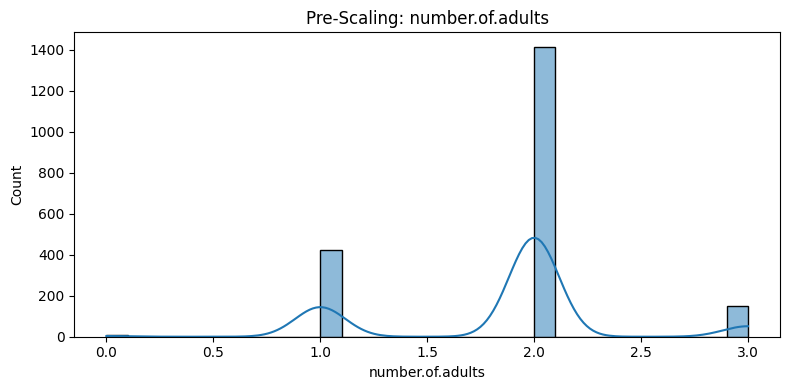

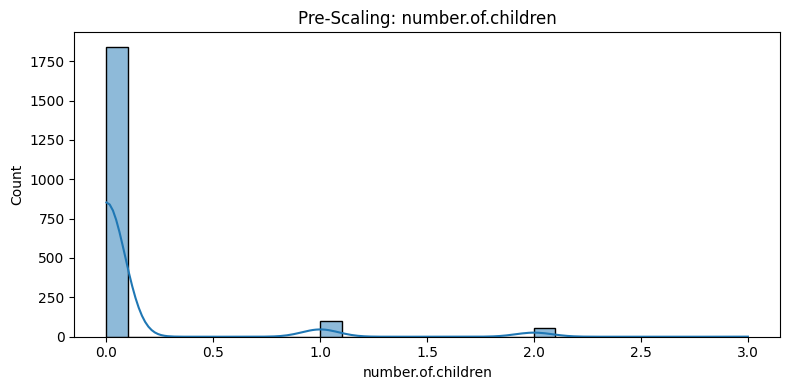

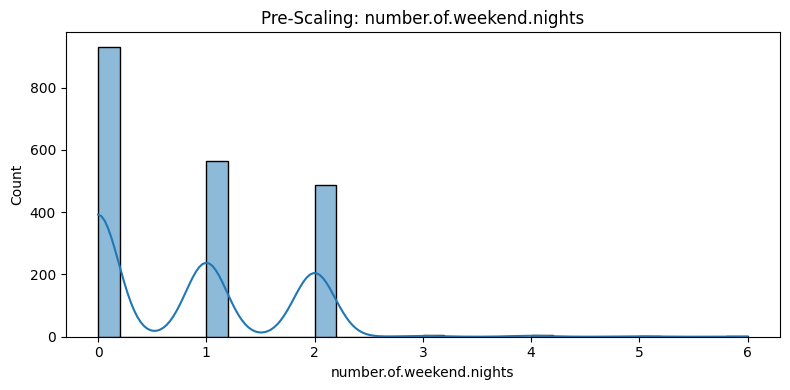

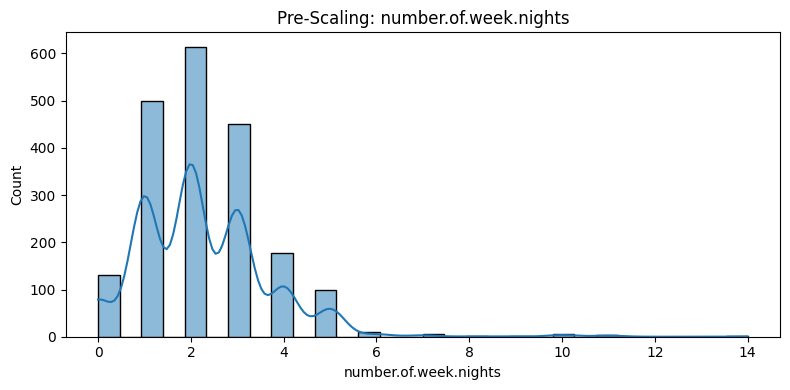

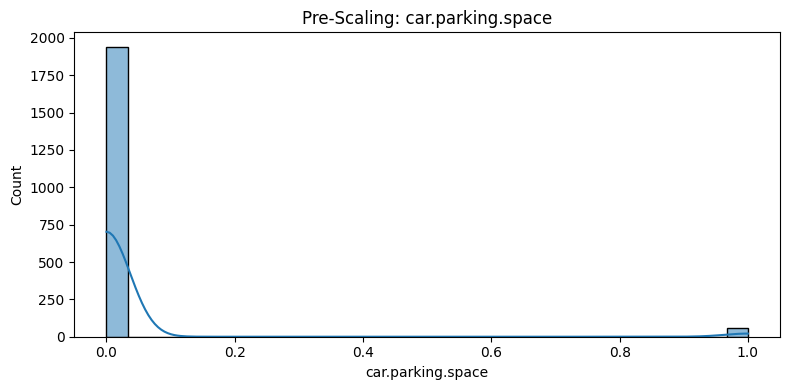

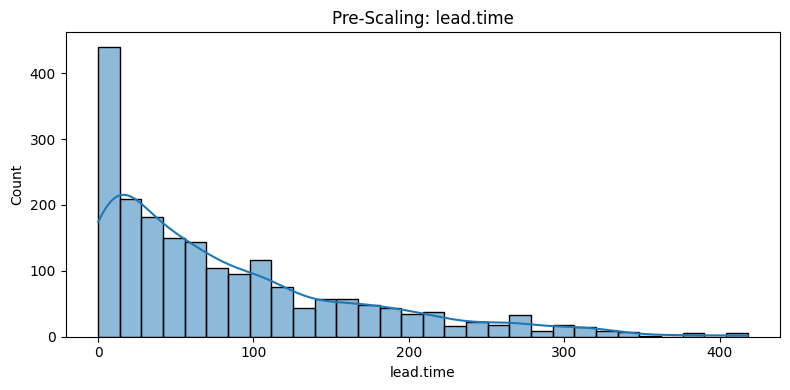

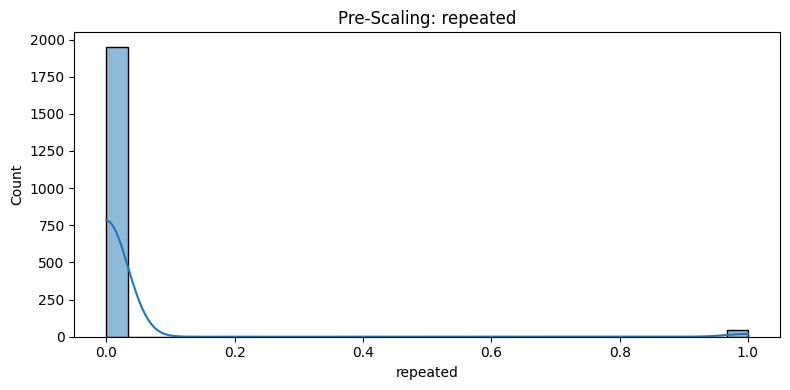

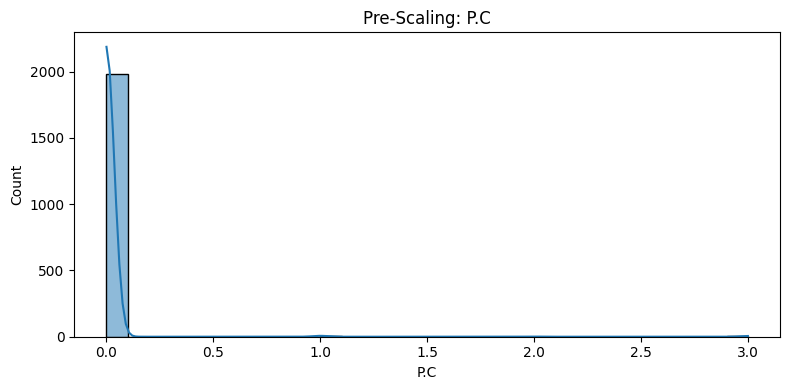

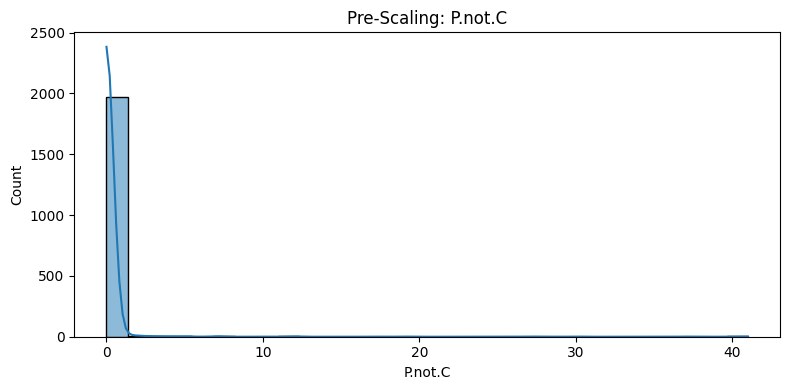

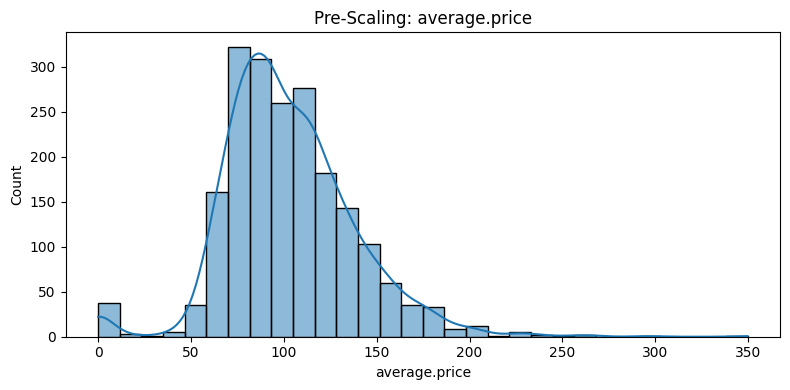

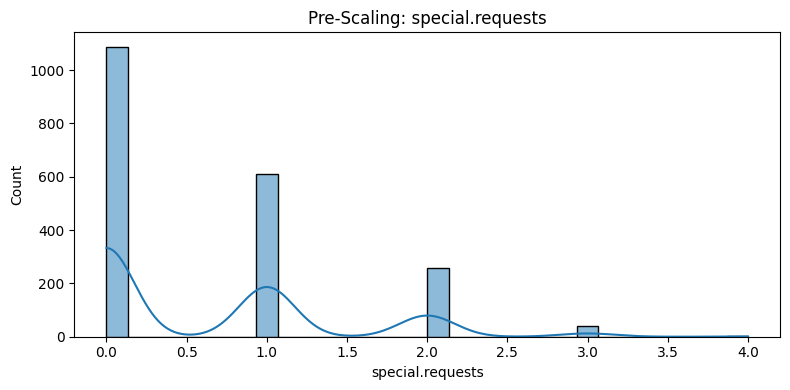

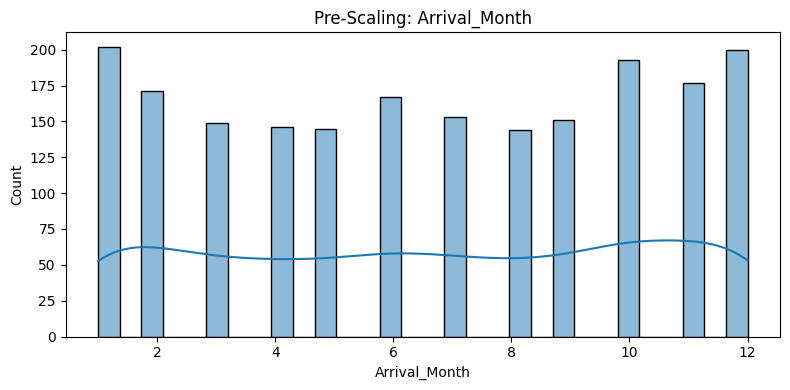

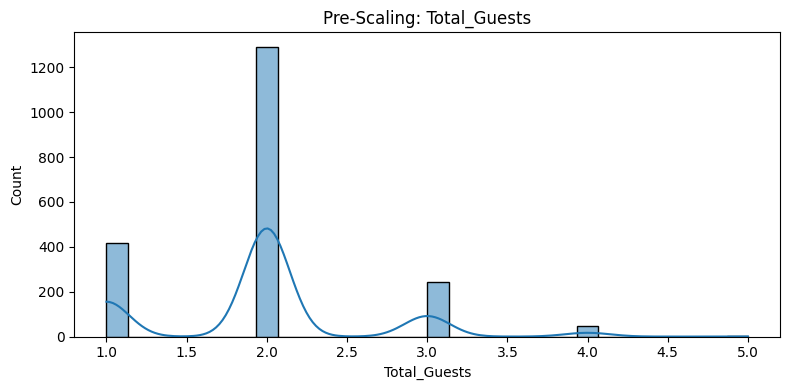

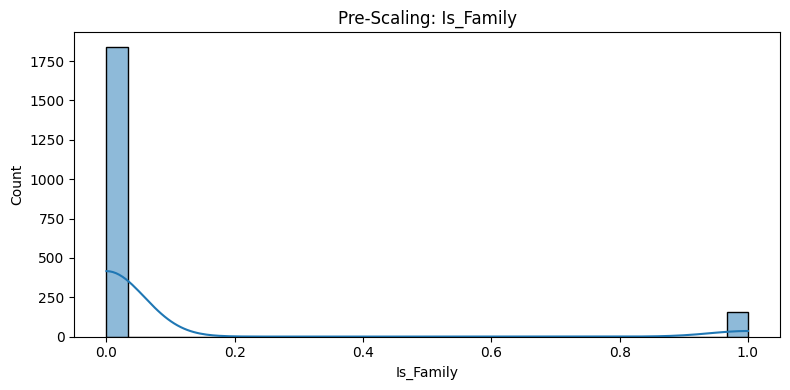

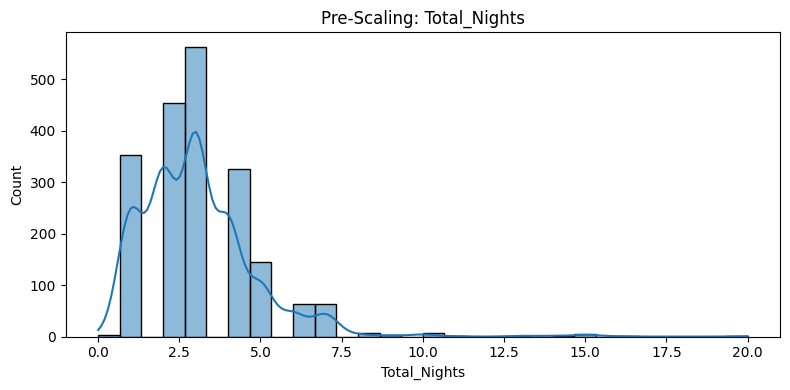

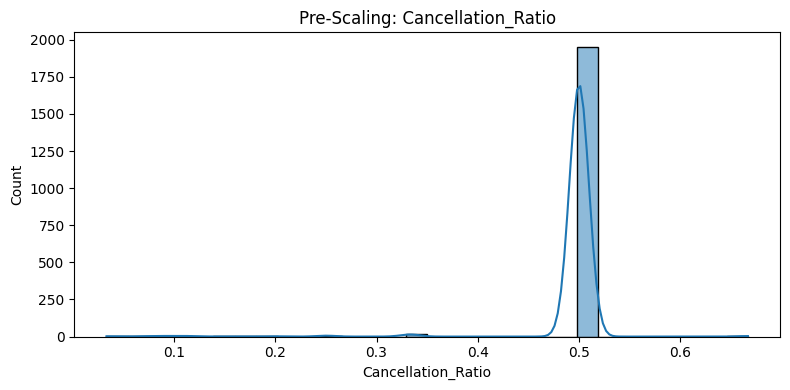

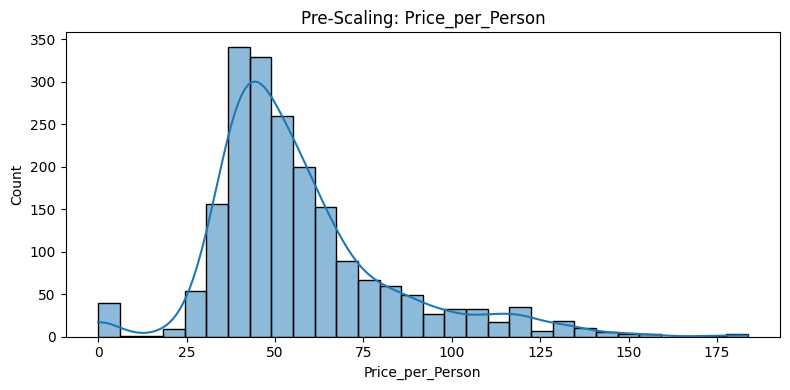

Fitting and transforming...

--- Visualizing 17 Distributions AFTER Scaling ---


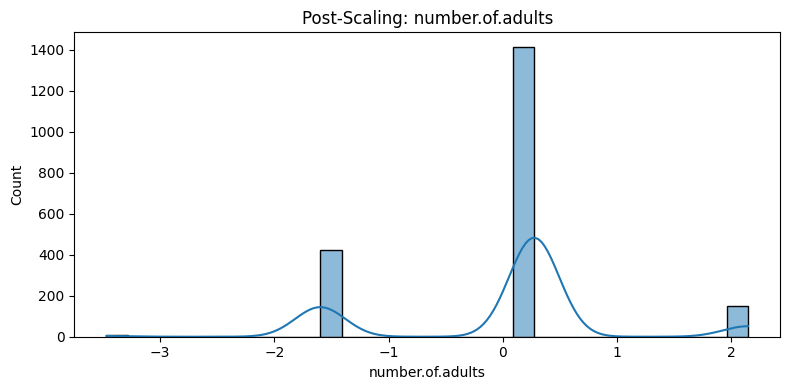

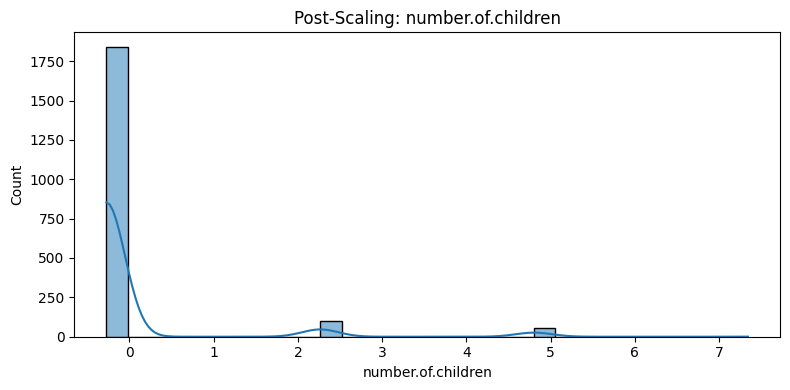

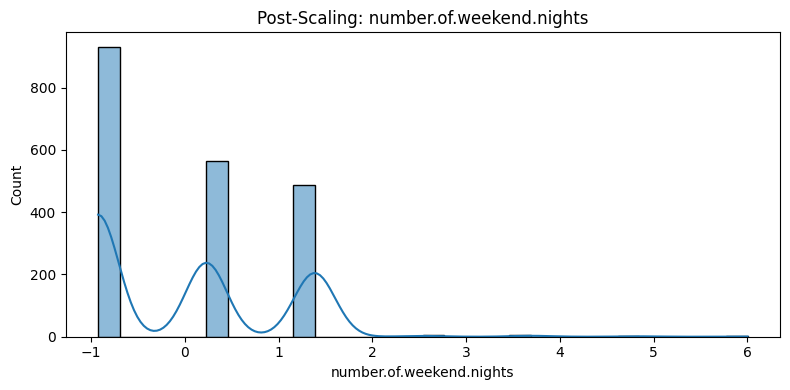

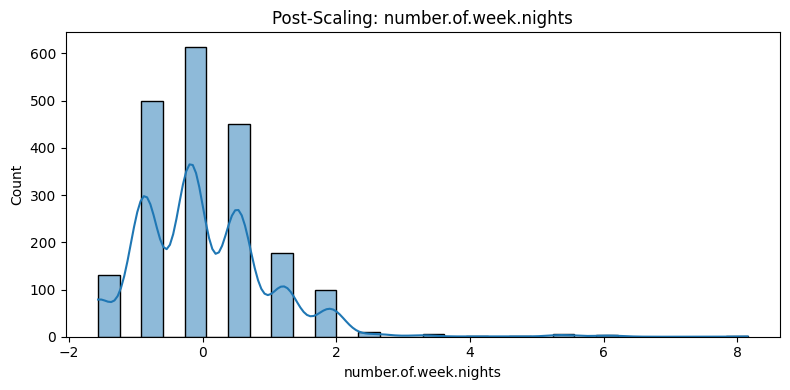

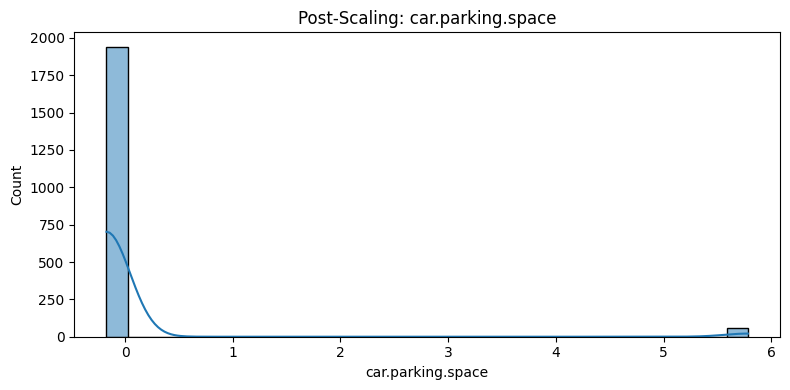

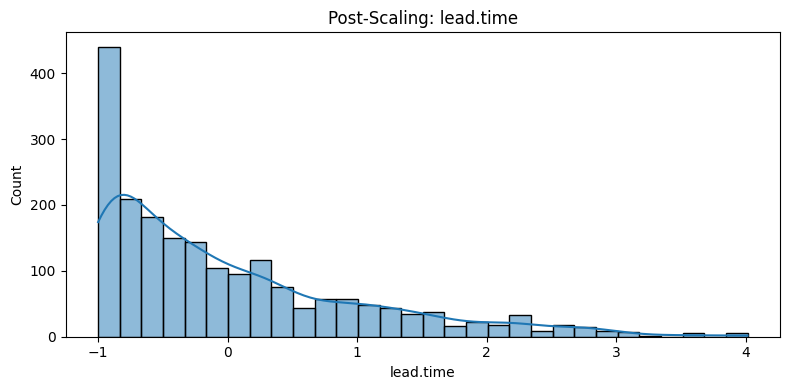

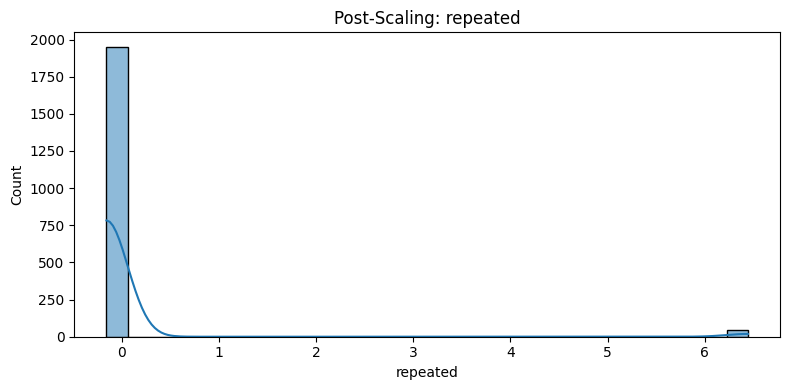

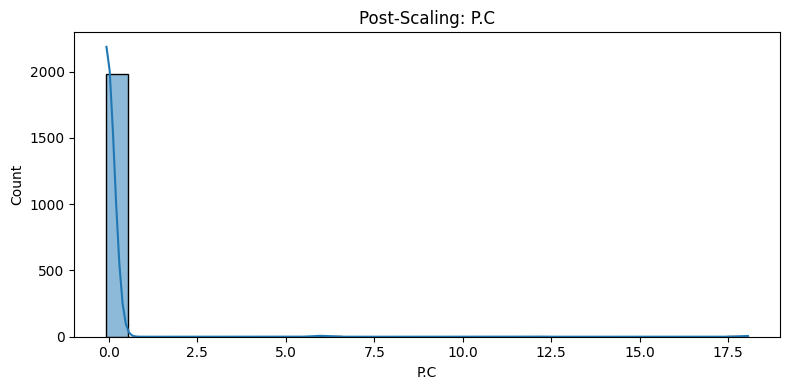

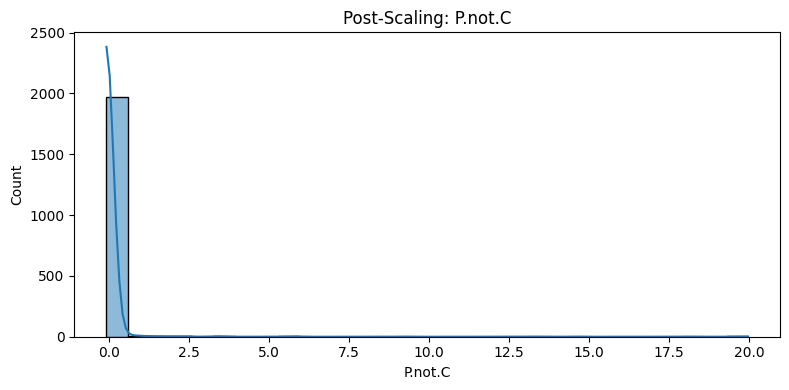

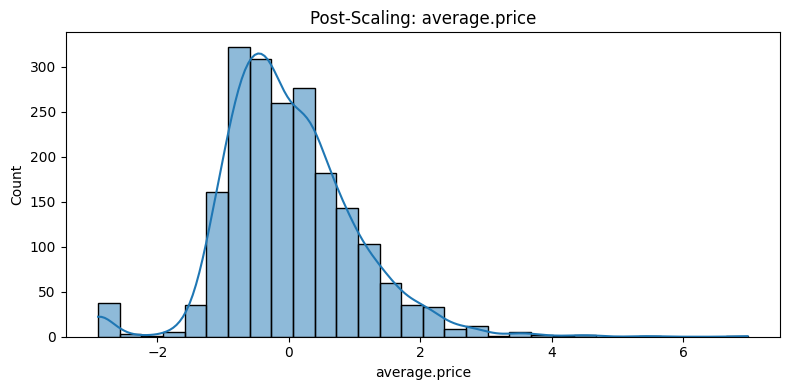

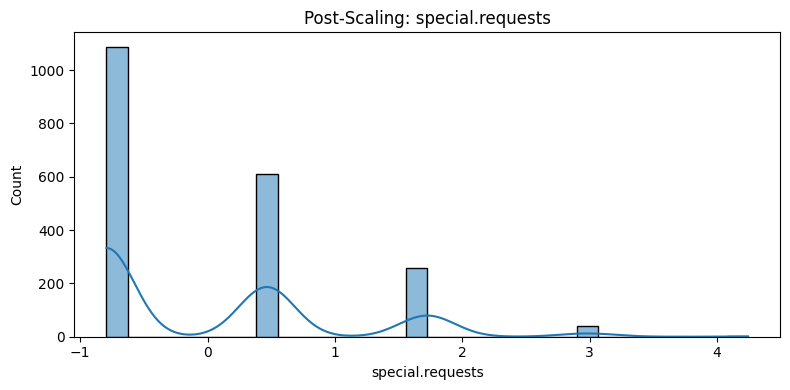

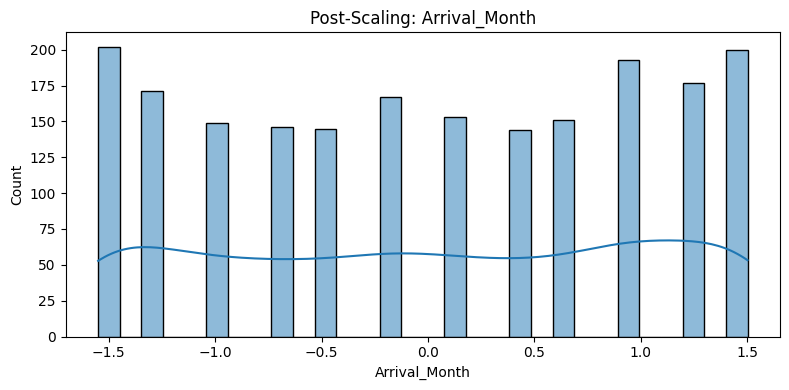

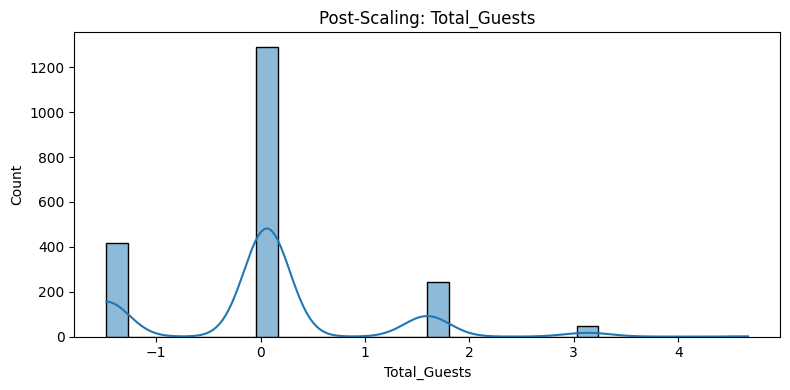

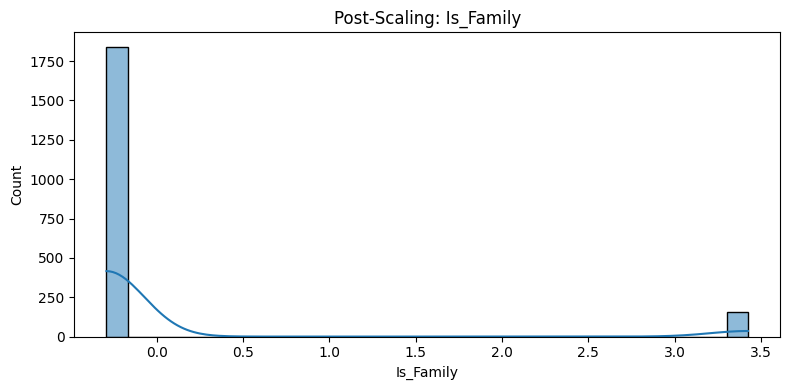

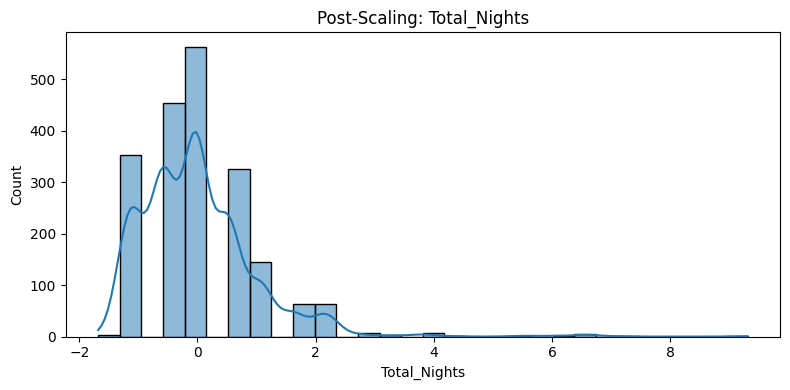

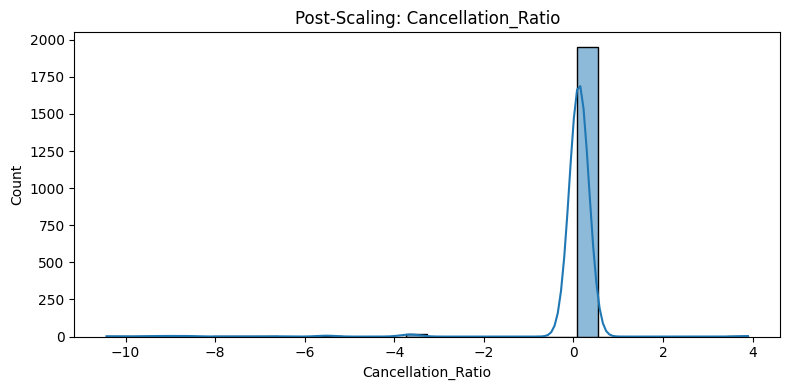

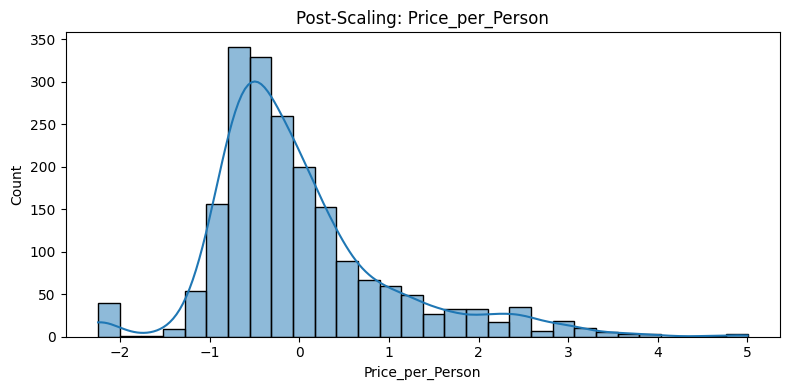

Preprocessing finished. Shape: (1998, 33)

Preview: first 10 rows of preprocessed features:


,number.of.adults,number.of.children,number.of.weekend.nights,number.of.week.nights,car.parking.space,lead.time,repeated,P.C,P.not.C,average.price,special.requests,Arrival_Month,Total_Guests,Is_Family,Total_Nights,Cancellation_Ratio,Price_per_Person,type.of.meal_Meal Plan 1,type.of.meal_Meal Plan 2,type.of.meal_Meal Plan 3,type.of.meal_Not Selected,room.type_Room_Type 1,room.type_Room_Type 2,room.type_Room_Type 3,room.type_Room_Type 4,room.type_Room_Type 5,room.type_Room_Type 6,room.type_Room_Type 7,market.segment.type_Aviation,market.segment.type_Complementary,market.segment.type_Corporate,market.segment.type_Offline,market.segment.type_Online
0,0.274549,-0.273247,0.228250,-1.566515,-0.172907,-0.999730,-0.155210,-0.06955,-0.086379,0.347090,0.465821,0.946675,0.059961,-0.292027,-1.130908,0.126935,0.024700,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.274549,-0.273247,0.228250,1.210678,-0.172907,-0.867836,-0.155210,-0.06955,-0.086379,-0.359297,1.725239,0.391914,0.059961,-0.292027,1.066567,0.126935,-0.468587,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.597632,-0.273247,1.382793,-0.872217,-0.172907,-0.604048,-0.155210,-0.06955,-0.086379,-0.559911,1.725239,-0.162846,-1.475956,-0.292027,-0.032170,0.126935,1.027059,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.274549,-0.273247,-0.926292,-0.872217,-0.172907,-0.340261,-0.155210,-0.06955,-0.086379,0.036280,-0.793597,0.114534,0.059961,-0.292027,-1.130908,0.126935,-0.192346,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.274549,2.266041,-0.926292,-0.177918,-0.172907,0.654938,-0.155210,-0.06955,-0.086379,1.039350,0.465821,-1.549748,1.595877,3.424341,-0.581539,0.126935,-0.409393,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2.146730,-0.273247,-0.926292,0.516380,-0.172907,0.918726,-0.155210,-0.06955,-0.086379,0.988490,-0.793597,1.501435,1.595877,-0.292027,-0.032170,0.126935,-0.433070,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,-1.597632,-0.273247,0.228250,-0.872217,-0.172907,-0.963759,6.442875,-0.06955,0.402532,-0.373425,0.465821,1.501435,-1.475956,-0.292027,-0.581539,-3.642577,1.287515,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.274549,-0.273247,-0.926292,0.516380,-0.172907,0.283237,-0.155210,-0.06955,-0.086379,-1.263474,-0.793597,0.114534,0.059961,-0.292027,-0.032170,0.126935,-1.099994,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,-1.597632,-0.273247,0.228250,-0.872217,-0.172907,-0.795894,-0.155210,-0.06955,-0.086379,0.339461,0.465821,1.501435,-1.475956,-0.292027,-0.581539,0.126935,2.283165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.274549,-0.273247,-0.926292,0.516380,-0.172907,-0.783903,-0.155210,-0.06955,-0.086379,-2.563227,1.725239,-1.272368,0.059961,-0.292027,-0.032170,0.126935,-2.007643,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Preprocessing implementation with individual plot visualization
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from IPython.display import display

def plot_distributions_individual(df, columns, title_prefix):
    """Plot each histogram in a separate figure"""
    for col in columns:
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30, ax=ax)
        ax.set_title(f'{title_prefix}: {col}')
        ax.set_xlabel(col)
        plt.tight_layout()
        plt.show()  # This triggers display in inline backend
        # Do NOT call plt.close() - it prevents the figure from rendering

def preprocess_dataframe(df):
    print('--- Step 1: Copying original dataframe')
    df = df.copy()
    
    print('--- Step 2: Feature engineering')
    # Parse dates robustly
    df['date.of.reservation'] = pd.to_datetime(df['date.of.reservation'], errors='coerce')
    df = df.dropna(subset=['date.of.reservation'])

    df['arrival_date'] = df['date.of.reservation'] + pd.to_timedelta(df['lead.time'], unit='D')
    df['Arrival_Month'] = df['arrival_date'].dt.month.astype(int)
    df['Total_Guests'] = df['number.of.adults'] + df['number.of.children']
    df['Is_Family'] = (df['number.of.children'] > 0).astype(int)
    df['Total_Nights'] = df['number.of.weekend.nights'] + df['number.of.week.nights']
    df['Cancellation_Ratio'] = (df['P.C'] + 1) / (df['P.not.C'] + df['P.C'] + 2)
    df['Price_per_Person'] = df.apply(lambda r: r['average.price']/r['Total_Guests'] if r['Total_Guests']>0 else 0, axis=1)

    print('--- Step 3: Drop columns and separate labels')
    labels = df['booking.status'].copy()
    X = df.drop(columns=['Booking_ID','date.of.reservation','arrival_date','booking.status'])

    # Categorical and numerical columns
    categorical_cols = ['type.of.meal','room.type','market.segment.type']
    numerical_cols = [c for c in X.columns if c not in categorical_cols]

    # --- VISUALIZATION 1: Before Scaling ---
    print(f'\n--- Visualizing {len(numerical_cols)} Distributions BEFORE Scaling ---')
    plot_distributions_individual(X, numerical_cols, "Pre-Scaling")

    # ColumnTransformer
    cat = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    num = StandardScaler()
    pre = ColumnTransformer([('num', num, numerical_cols), ('cat', cat, categorical_cols)])

    print('Fitting and transforming...')
    X_proc = pre.fit_transform(X)
    
    # Get feature names
    try:
        ohe_names = pre.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    except Exception:
        ohe_names = []
    feature_names = numerical_cols + list(ohe_names)

    X_df = pd.DataFrame(X_proc, columns=feature_names)
    
    # --- VISUALIZATION 2: After Scaling ---
    print(f'\n--- Visualizing {len(numerical_cols)} Distributions AFTER Scaling ---')
    plot_distributions_individual(X_df, numerical_cols, "Post-Scaling")

    print('Preprocessing finished. Shape:', X_df.shape)
    return X_df, labels, df

# Run preprocessing
X, labels, df_original = preprocess_dataframe(df_raw)
print('\nPreview: first 10 rows of preprocessed features:')
display(X.head(10))

## Clustering
This cell runs K-Means and Hierarchical clustering for a range of K and prints evaluation metrics.
You will be asked to inspect the results (Silhouette, Elbow) and choose the number of clusters for interpretation.

Running clustering tests for K=2..10
K=2 done.
K=2 done.
K=3 done.
K=3 done.
K=4 done.
K=4 done.
K=5 done.
K=5 done.
K=6 done.
K=6 done.
K=7 done.
K=7 done.
K=8 done.
K=8 done.
K=9 done.
K=9 done.
K=10 done.
K=10 done.


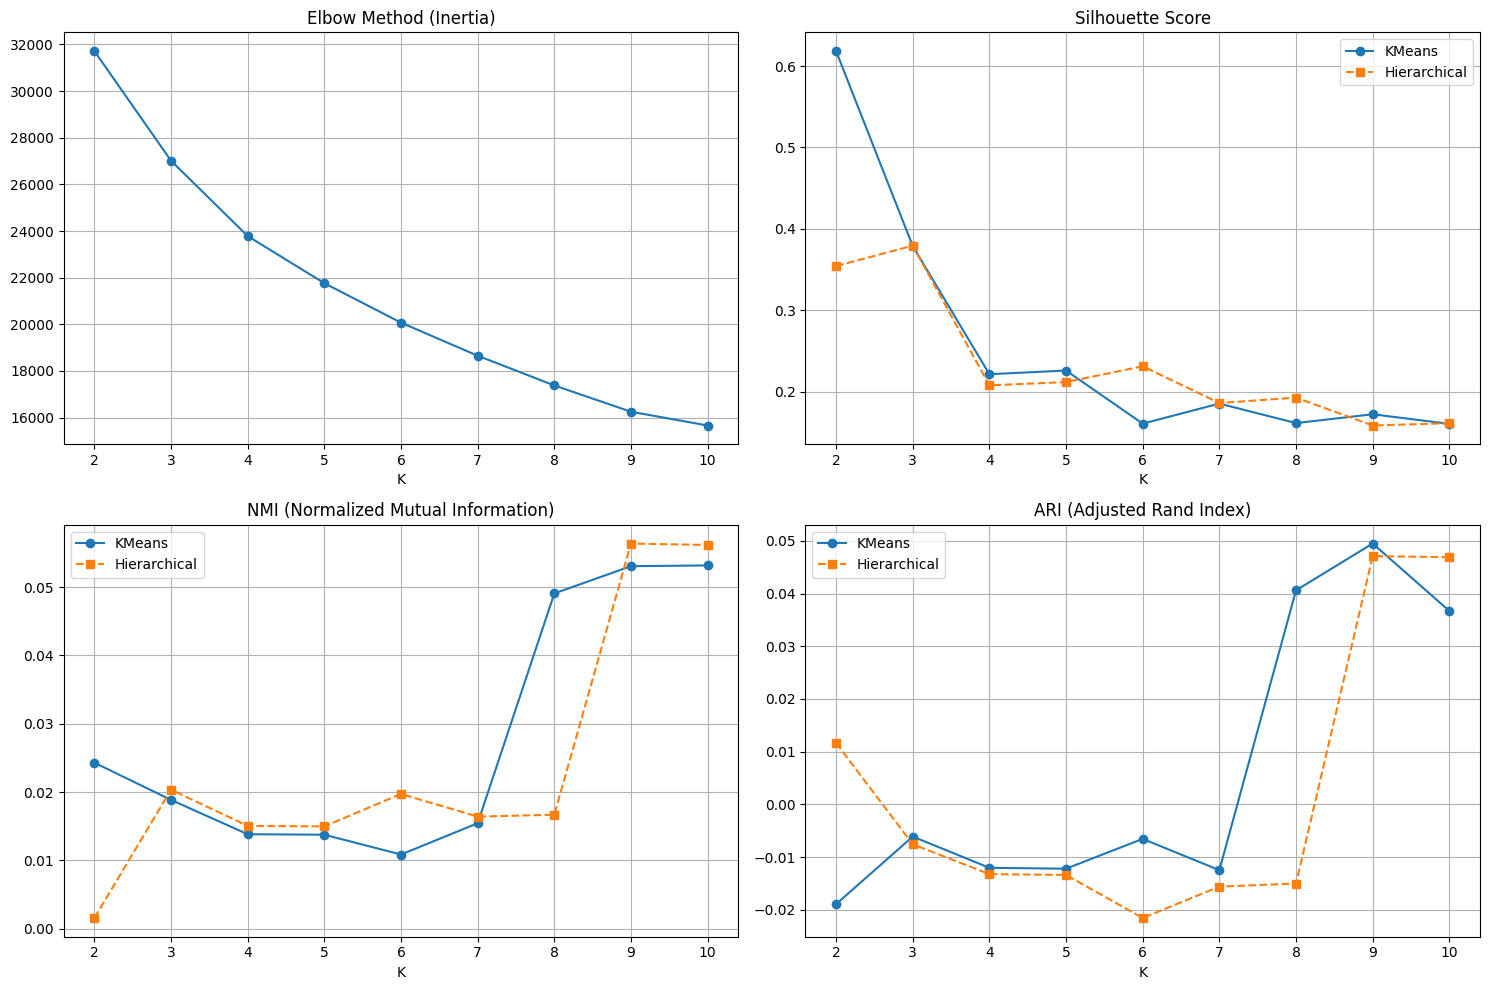


--- PCA Visualization (Projecting to 2D) ---


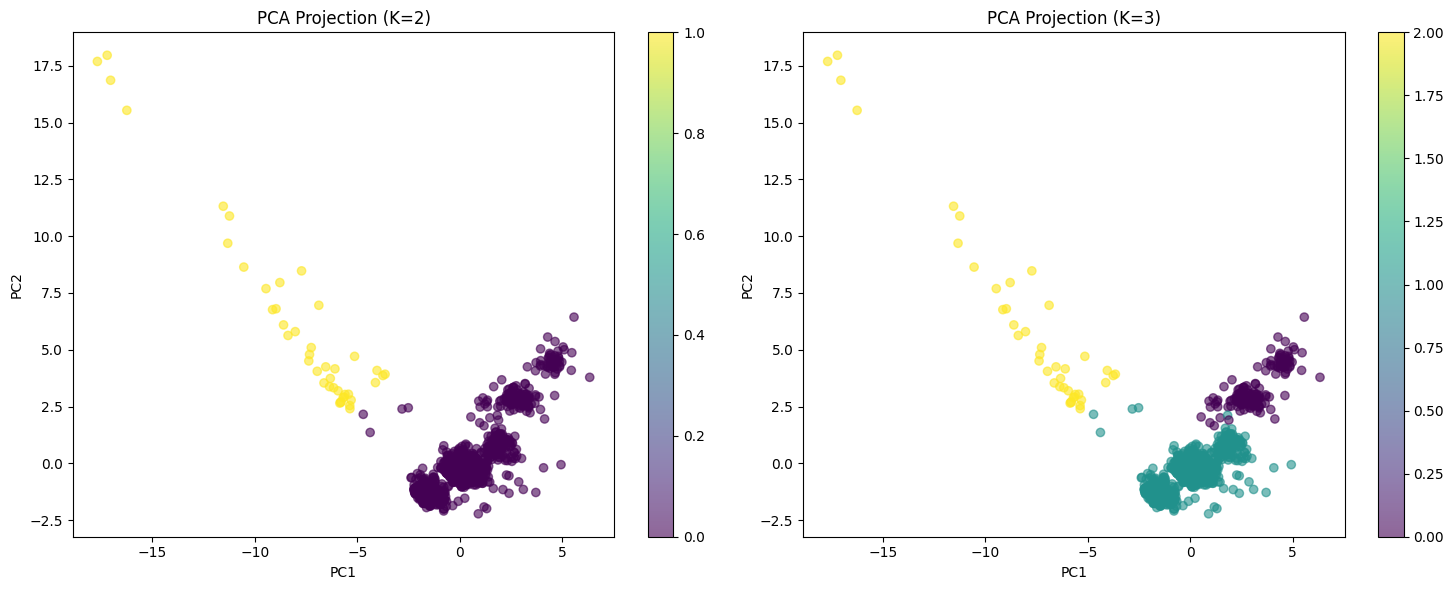

Explained Variance by 2 components: 33.47%


In [29]:
# Clustering step with enhanced visualization
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

print('Running clustering tests for K=2..10')
ks = range(2,11)
k_inertia = []
k_sil = []
hc_sil = []
k_nmi = []
k_ari = []
hc_nmi = []
hc_ari = []

# Map labels to numeric codes for evaluation only
labels_num = labels.map({'Not_Canceled':0,'Canceled':1})
if labels_num.isnull().any():
    labels_num = labels.astype('category').cat.codes

for k in ks:
    # K-Means
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km_labels = km.fit_predict(X)
    k_inertia.append(km.inertia_)
    k_sil.append(silhouette_score(X, km_labels))
    k_nmi.append(normalized_mutual_info_score(labels_num, km_labels))
    k_ari.append(adjusted_rand_score(labels_num, km_labels))

    # Hierarchical
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    hc_labels = hc.fit_predict(X)
    hc_sil.append(silhouette_score(X, hc_labels))
    hc_nmi.append(normalized_mutual_info_score(labels_num, hc_labels))
    hc_ari.append(adjusted_rand_score(labels_num, hc_labels))
    print(f'K={k} done.')

# --- Plotting Metrics ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Elbow
axes[0,0].plot(list(ks), k_inertia, marker='o')
axes[0,0].set_title('Elbow Method (Inertia)')
axes[0,0].set_xlabel('K')
axes[0,0].grid(True)

# Silhouette
axes[0,1].plot(list(ks), k_sil, marker='o', label='KMeans')
axes[0,1].plot(list(ks), hc_sil, marker='s', linestyle='--', label='Hierarchical')
axes[0,1].set_title('Silhouette Score')
axes[0,1].set_xlabel('K')
axes[0,1].legend()
axes[0,1].grid(True)

# NMI
axes[1,0].plot(list(ks), k_nmi, marker='o', label='KMeans')
axes[1,0].plot(list(ks), hc_nmi, marker='s', linestyle='--', label='Hierarchical')
axes[1,0].set_title('NMI (Normalized Mutual Information)')
axes[1,0].set_xlabel('K')
axes[1,0].legend()
axes[1,0].grid(True)

# ARI
axes[1,1].plot(list(ks), k_ari, marker='o', label='KMeans')
axes[1,1].plot(list(ks), hc_ari, marker='s', linestyle='--', label='Hierarchical')
axes[1,1].set_title('ARI (Adjusted Rand Index)')
axes[1,1].set_xlabel('K')
axes[1,1].legend()
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

# --- PCA Visualization (2D Projection) ---
print('\n--- PCA Visualization (Projecting to 2D) ---')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Let's visualize K=2 and K=3 for K-Means to see the structure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# K=2
km2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels2 = km2.fit_predict(X)
scatter1 = axes[0].scatter(X_pca[:,0], X_pca[:,1], c=labels2, cmap='viridis', alpha=0.6)
axes[0].set_title('PCA Projection (K=2)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
plt.colorbar(scatter1, ax=axes[0])

# K=3
km3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels3 = km3.fit_predict(X)
scatter2 = axes[1].scatter(X_pca[:,0], X_pca[:,1], c=labels3, cmap='viridis', alpha=0.6)
axes[1].set_title('PCA Projection (K=3)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

print(f'Explained Variance by 2 components: {pca.explained_variance_ratio_.sum():.2%}')

## Next steps (suggested)
- Choose a K (for example 2 or 3 from the earlier discussion).
- Run clustering with the chosen K and produce descriptive statistics for each cluster (means, counts, cancellation rate).
- Save cluster assignments back to CSV for reporting.